In [1]:
#!/usr/bin/env python2
import os
from getpass import getuser
import numpy as np
from theano import config

import PIL.Image as Image
from matplotlib import pyplot as plt
from matplotlib import colors


from sklearn.preprocessing import normalize

from data_loader.cortical_layers import Cortical6LayersDataset

%matplotlib inline


In [2]:
_FLOATX = config.floatX

SAVEPATH = '/Tmp/larocste/cortical_layers'
LOADPATH = '/data/lisatmp4/larocste/cortical_layers'
WEIGHTS_PATH = LOADPATH


In [3]:
def make_2Darray(arr, height = 25):
    arr = np.reshape(arr, (1,arr.shape[0]))
    x = np.repeat(arr, height, 0)
    return x
    

In [4]:
batch_size = 100
val_iter = Cortical6LayersDataset(which_set='valid', batch_size = batch_size, smooth_or_raw='both')

n_classes = val_iter.nclasses

In [5]:
valid_batch = val_iter.next()

X_batch, L_batch, idx_batch = valid_batch['data'], valid_batch['labels'], valid_batch['filenames'][0]



In [6]:
idx = np.random.randint(batch_size)

ray = X_batch[idx]
ray_smooth = ray[0]
ray_raw = ray[1]
labels = L_batch[idx]

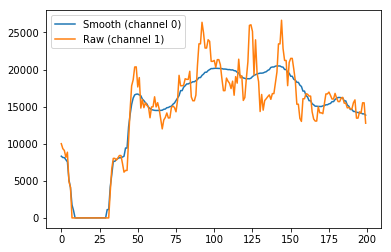

In [7]:
plt.plot(ray_smooth)
plt.plot(ray_raw)
plt.legend(["Smooth (channel 0)", "Raw (channel 1)"])
plt.show()

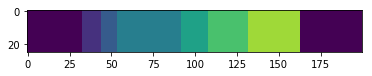

In [8]:
# plt.title('Ground truth labels')
plt.imshow(make_2Darray(labels), interpolation='none', vmin=0, vmax=n_classes)
plt.show()